# Project 2: Wrangle and Analyze Data

### 1- Importing general purpose libraries

In [317]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
% matplotlib inline

### 2- Gathering data

#### 2.1 - Loading WeRateDogs Twitter Archive

In [318]:
# Reading .csv file
df_tw_arch = pd.read_csv("twitter-archive-enhanced.csv")

#### 2.2 - Importing and loading the Tweet image predictions

In [319]:
# Importing data
# Code in this cell is adapted from "https://www.codegrepper.com/code-examples/python/python+requests+download+file" 
import requests
r = requests.get("https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv", allow_redirects=True)
with open('image_predictions.tsv', 'wb') as im_pred_file:
    im_pred_file.write(r.content)

In [320]:
# Loading data
df_im_pred = pd.read_csv("image_predictions.tsv", sep='\t')

#### 2.3 - Querying and loading the Twitter API data

In [ ]:
#This code is copied from twitter_api.py file available as a supporting material for this project
import tweepy
from tweepy import OAuthHandler
import json
from timeit import default_timer as timer

# Query Twitter API for each tweet in the Twitter archive and save JSON in a text file
# These are hidden to comply with Twitter's API terms and conditions
consumer_key = 'HIDDEN'
consumer_secret = 'HIDDEN'
access_token = 'HIDDEN'
access_secret = 'HIDDEN'

auth = OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, wait_on_rate_limit=True)

# NOTE TO STUDENT WITH MOBILE VERIFICATION ISSUES:
# df_1 is a DataFrame with the twitter_archive_enhanced.csv file. You may have to
# change line 17 to match the name of your DataFrame with twitter_archive_enhanced.csv
# NOTE TO REVIEWER: this student had mobile verification issues so the following
# Twitter API code was sent to this student from a Udacity instructor
# Tweet IDs for which to gather additional data via Twitter's API
tweet_ids = df_tw_arch.tweet_id.values
len(tweet_ids)

# Query Twitter's API for JSON data for each tweet ID in the Twitter archive
count = 0
fails_dict = {}
start = timer()
# Save each tweet's returned JSON as a new line in a .txt file
with open('tweet_json.txt', 'w') as outfile:
    # This loop will likely take 20-30 minutes to run because of Twitter's rate limit
    for tweet_id in tweet_ids:
        count += 1
        print(str(count) + ": " + str(tweet_id))
        try:
            tweet = api.get_status(tweet_id, tweet_mode='extended')
            print("Success")
            json.dump(tweet._json, outfile)
            outfile.write('\n')
        except tweepy.TweepError as e:
            print("Fail")
            fails_dict[tweet_id] = e
            pass
end = timer()
print(end - start)
print(fails_dict)

In [321]:
# Code in this cell is adapted from "https://stackoverflow.com/questions/30088006/loading-a-file-with-more-than-one-line-of-json-into-pandas"
df_tw_api = pd.read_json("tweet-json.txt", lines=True)

### 3- Assessing Data

#### 3.1- Assessing the WeRateDogs Twitter Archive data

In [322]:
df_tw_arch.head(10)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643555336193/photo/1,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421306343426/photo/1,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181378084864/photo/1,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557279858688/photo/1,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f",NaN,NaN,NaN,"https://twitter.com/dog_rates/status/891327558926688256/photo/1,https://twitter.com/dog_rates/status/891327558926688256/photo/1",12,10,Franklin,None,None,None,None
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here we have a majestic great white breaching off South Africa's coast. Absolutely h*ckin breathtaking. 13/10 (IG: tucker_marlo) #BarkWeek https://t.co/kQ04fDDRmh,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950875897856/photo/1,13,10,None,None,None,None,None
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Meet Jax. He enjoys ice cream so much he gets nervous around it. 13/10 help Jax enjoy more things by clicking below\n\nhttps://t.co/Zr4hWfAs1H https://t.co/tVJBRMnhxl,NaN,NaN,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,https://twitter.com/dog_rates/status/890971913173991426/photo/1",13,10,Jax,None,None,None,None
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",When you watch your owner call another dog a good boy but then they turn back to you and say you're a great boy. 13/10 https://t.co/v0nONBcwxq,NaN,NaN,NaN,"https://twitter.com/dog_rates/status/890729181411237888/photo/1,https://twitter.com/dog_rates/status/890729181411237888/photo/1",13,10,None,None,None,None,None
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Zoey. She doesn't want to be one of the scary sharks. Just wants to be a snuggly pettable boatpet. 13/10 #BarkWeek https://t.co/9TwLuAGH0b,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890609185150312448/photo/1,13,10,Zoey,None,None,None,None
9,89024025534

In [323]:
df_tw_arch.tail(10)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
2346,666058600524156928,NaN,NaN,2015-11-16 01:01:59 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here is the Rand Paul of retrievers folks! He's probably good at poker. Can drink beer (lol rad). 8/10 good dog https://t.co/pYAJkAe76p,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666058600524156928/photo/1,8,10,the,None,None,None,None
2347,666057090499244032,NaN,NaN,2015-11-16 00:55:59 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",My oh my. This is a rare blond Canadian terrier on wheels. Only $8.98. Rather docile. 9/10 very rare https://t.co/yWBqbrzy8O,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666057090499244032/photo/1,9,10,a,None,None,None,None
2348,666055525042405380,NaN,NaN,2015-11-16 00:49:46 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here is a Siberian heavily armored polar bear mix. Strong owner. 10/10 I would do unspeakable things to pet this dog https://t.co/rdivxLiqEt,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666055525042405380/photo/1,10,10,a,None,None,None,None
2349,666051853826850816,NaN,NaN,2015-11-16 00:35:11 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is an odd dog. Hard on the outside but loving on the inside. Petting still fun. Doesn't play catch well. 2/10 https://t.co/v5A4vzSDdc,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666051853826850816/photo/1,2,10,an,None,None,None,None
2350,666050758794694657,NaN,NaN,2015-11-16 00:30:50 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is a truly beautiful English Wilson Staff retriever. Has a nice phone. Privileged. 10/10 would trade lives with https://t.co/fvIbQfHjIe,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666050758794694657/photo/1,10,10,a,None,None,None,None
2351,666049248165822465,NaN,NaN,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here we have a 1949 1st generation vulpix. Enjoys sweat tea and Fox News. Cannot be phased. 5/10 https://t.co/4B7cOc1EDq,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248165822465/photo/1,5,10,None,None,None,None,None
2352,666044226329800704,NaN,NaN,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is a purebred Piers Morgan. Loves to Netflix and chill. Always looks like he forgot to unplug the iron. 6/10 https://t.co/DWnyCjf2mx,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226329800704/photo/1,6,10,a,None,None,None,None
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here is a very happy pup. Big fan of well-maintained decks. Just look at that tongue. 9/10 would cuddle af https://t.co/y671yMhoiR,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412701032449/photo/1,9,10,a,None,None,None,None
2354,666029285002620928,NaN,NaN,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is a western brown Mitsubishi terrier. Upset about leaf. Actually 2 dogs here. 7/10 would walk the shit out of https://t.co/r7mOb2m0UI,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285002620928/photo/1,7,10,a,None,None,None,None
2355,666020888022790149,NaN,NaN,2015-11-15 22:32:08 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here we have a Japanese Irish Setter. Lost eye in Vietnam (?). Big fan of relaxing on stair. 8/10 would pet https://t.co/BLDqew2Ijj,NaN,NaN,NaN,https://twi

<b><u>Data quality issue 1:</u> Dog names have missing "None" values rather than NaN.

<b><u>Data tidiness issue 1:</u> Columns doggo, floofer, pupper, and puppo represent the same variable type which is dog breed and should be gathered into a single column </b>

In [324]:
df_tw_arch.isna().sum()

tweet_id                         0
in_reply_to_status_id         2278
in_reply_to_user_id           2278
timestamp                        0
source                           0
text                             0
retweeted_status_id           2175
retweeted_status_user_id      2175
retweeted_status_timestamp    2175
expanded_urls                   59
rating_numerator                 0
rating_denominator               0
name                             0
doggo                            0
floofer                          0
pupper                           0
puppo                            0
dtype: int64

In [325]:
pd.options.display.max_colwidth = 100
print(df_tw_arch.expanded_urls.head())
print(df_tw_arch.expanded_urls.tail())

0                                        https://twitter.com/dog_rates/status/892420643555336193/photo/1
1                                        https://twitter.com/dog_rates/status/892177421306343426/photo/1
2                                        https://twitter.com/dog_rates/status/891815181378084864/photo/1
3                                        https://twitter.com/dog_rates/status/891689557279858688/photo/1
4    https://twitter.com/dog_rates/status/891327558926688256/photo/1,https://twitter.com/dog_rates/st...
Name: expanded_urls, dtype: object
2351    https://twitter.com/dog_rates/status/666049248165822465/photo/1
2352    https://twitter.com/dog_rates/status/666044226329800704/photo/1
2353    https://twitter.com/dog_rates/status/666033412701032449/photo/1
2354    https://twitter.com/dog_rates/status/666029285002620928/photo/1
2355    https://twitter.com/dog_rates/status/666020888022790149/photo/1
Name: expanded_urls, dtype: object


In [326]:
# The head of the expanded urls columns show an issue with the values, let's investigate further
df_tw_arch.expanded_urls[4]

'https://twitter.com/dog_rates/status/891327558926688256/photo/1,https://twitter.com/dog_rates/status/891327558926688256/photo/1'

In [327]:
pd.options.display.max_colwidth = 200
df_tw_arch.expanded_urls[df_tw_arch.expanded_urls.notnull()][df_tw_arch.expanded_urls[df_tw_arch.expanded_urls.notnull()].str.contains(",")]

4                                                                               https://twitter.com/dog_rates/status/891327558926688256/photo/1,https://twitter.com/dog_rates/status/891327558926688256/photo/1
6                                                                                                   https://gofundme.com/ydvmve-surgery-for-jax,https://twitter.com/dog_rates/status/890971913173991426/photo/1
7                                                                               https://twitter.com/dog_rates/status/890729181411237888/photo/1,https://twitter.com/dog_rates/status/890729181411237888/photo/1
10                                                                              https://twitter.com/dog_rates/status/890006608113172480/photo/1,https://twitter.com/dog_rates/status/890006608113172480/photo/1
13                                                                              https://twitter.com/dog_rates/status/889638837579907072/photo/1,https://twitter.com/dog_

<b><u>Data quality issue 2:</u> some expanded urls are repeated multiple times (split with a comma)

In [328]:
df_tw_arch.dtypes

tweet_id                        int64
in_reply_to_status_id         float64
in_reply_to_user_id           float64
timestamp                      object
source                         object
text                           object
retweeted_status_id           float64
retweeted_status_user_id      float64
retweeted_status_timestamp     object
expanded_urls                  object
rating_numerator                int64
rating_denominator              int64
name                           object
doggo                          object
floofer                        object
pupper                         object
puppo                          object
dtype: object

<b><u>Data quality issue 3:</u> Data types of id columns (tweet_id, in_reply_to_status_id, in_reply_to_user_id, retweeted_status_id, retweeted_status_user_id) are integers or floats rather than a string.</b>

<b><u>Data quality issue 4:</u> Data types of the timestamp columns (timestamp, retweeted_status_timestamp) are strings rather than datetime</b>

In [329]:
df_tw_arch[df_tw_arch.retweeted_status_id.notna()]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
19,888202515573088257,NaN,NaN,2017-07-21 01:02:36 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",RT @dog_rates: This is Canela. She attempted some fancy porch pics. They were unsuccessful. 13/10 someone help her https://t.co/cLyzpcUcMX,8.874740e+17,4.196984e+09,2017-07-19 00:47:34 +0000,"https://twitter.com/dog_rates/status/887473957103951883/photo/1,https://twitter.com/dog_rates/status/887473957103951883/photo/1,https://twitter.com/dog_rates/status/887473957103951883/photo/1,http...",13,10,Canela,None,None,None,None
32,886054160059072513,NaN,NaN,2017-07-15 02:45:48 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",RT @Athletics: 12/10 #BATP https://t.co/WxwJmvjfxo,8.860537e+17,1.960740e+07,2017-07-15 02:44:07 +0000,"https://twitter.com/dog_rates/status/886053434075471873,https://twitter.com/dog_rates/status/886053434075471873",12,10,None,None,None,None,None
36,885311592912609280,NaN,NaN,2017-07-13 01:35:06 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",RT @dog_rates: This is Lilly. She just parallel barked. Kindly requests a reward now. 13/10 would pet so well https://t.co/SATN4If5H5,8.305833e+17,4.196984e+09,2017-02-12 01:04:29 +0000,"https://twitter.com/dog_rates/status/830583320585068544/photo/1,https://twitter.com/dog_rates/status/830583320585068544/photo/1,https://twitter.com/dog_rates/status/830583320585068544/photo/1,http...",13,10,Lilly,None,None,None,None
68,879130579576475649,NaN,NaN,2017-06-26 00:13:58 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",RT @dog_rates: This is Emmy. She was adopted today. Massive round of pupplause for Emmy and her new family. 14/10 for all involved https://…,8.780576e+17,4.196984e+09,2017-06-23 01:10:23 +0000,"https://twitter.com/dog_rates/status/878057613040115712/photo/1,https://twitter.com/dog_rates/status/878057613040115712/photo/1",14,10,Emmy,None,None,None,None
73,878404777348136964,NaN,NaN,2017-06-24 00:09:53 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","RT @dog_rates: Meet Shadow. In an attempt to reach maximum zooming borkdrive, he tore his ACL. Still 13/10 tho. Help him out below\n\nhttps:/…",8.782815e+17,4.196984e+09,2017-06-23 16:00:04 +0000,"https://www.gofundme.com/3yd6y1c,https://twitter.com/dog_rates/status/878281511006478336/photo/1",13,10,Shadow,None,None,None,None
74,878316110768087041,NaN,NaN,2017-06-23 18:17:33 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",RT @dog_rates: Meet Terrance. He's being yelled at because he stapled the wrong stuff together. 11/10 hang in there Terrance https://t.co/i…,6.690004e+17,4.196984e+09,2015-11-24 03:51:38 +0000,https://twitter.com/dog_rates/status/669000397445533696/photo/1,11,10,Terrance,None,None,None,None
78,877611172832227328,NaN,NaN,2017-06-21 19:36:23 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",RT @rachel2195: @dog_rates the boyfriend and his soaking wet pupper h*cking love his new hat 14/10 https://t.co/dJx4Gzc50G,8.768508e+17,5.128045e+08,2017-06-19 17:14:49 +0000,"https://twitter.com/rachel2195/status/876850772322988033/photo/1,https://twitter.com/rachel2195/status/876850772322988033/photo/1,https://twitter.com/rachel2195/status/876850772322988033/photo/1,h...",14,10,None,None,None,pupper,None
91,874434818259525634,NaN,NaN,2017-06-13 01:14:41 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",RT @dog_rates: This is Coco. At first I thought she was a cloud but clouds don't bork with such passion. 12/10 would hug softly https

<b><u>Data quality issue 5:</u> The data has 181 retweets while we are interested in original ratings only

In [330]:
df_tw_arch[df_tw_arch.in_reply_to_status_id.notna()]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
30,886267009285017600,8.862664e+17,2.281182e+09,2017-07-15 16:51:35 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",@NonWhiteHat @MayhewMayhem omg hello tanner you are a scary good boy 12/10 would pet with extreme caution,NaN,NaN,NaN,NaN,12,10,None,None,None,None,None
55,881633300179243008,8.816070e+17,4.738443e+07,2017-07-02 21:58:53 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",@roushfenway These are good dogs but 17/10 is an emotional impulse rating. More like 13/10s,NaN,NaN,NaN,NaN,17,10,None,None,None,None,None
64,879674319642796034,8.795538e+17,3.105441e+09,2017-06-27 12:14:36 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",@RealKentMurphy 14/10 confirmed,NaN,NaN,NaN,NaN,14,10,None,None,None,None,None
113,870726314365509632,8.707262e+17,1.648776e+07,2017-06-02 19:38:25 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",@ComplicitOwl @ShopWeRateDogs &gt;10/10 is reserved for dogs,NaN,NaN,NaN,NaN,10,10,None,None,None,None,None
148,863427515083354112,8.634256e+17,7.759620e+07,2017-05-13 16:15:35 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","@Jack_Septic_Eye I'd need a few more pics to polish a full analysis, but based on the good boy content above I'm leaning towards 12/10",NaN,NaN,NaN,NaN,12,10,None,None,None,None,None
149,863079547188785154,6.671522e+17,4.196984e+09,2017-05-12 17:12:53 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","Ladies and gentlemen... I found Pipsy. He may have changed his name to Pablo, but he never changed his love for the sea. Pupgraded to 14/10 https://t.co/lVU5GyNFen",NaN,NaN,NaN,https://twitter.com/dog_rates/status/863079547188785154/photo/1,14,10,None,None,None,None,None
179,857214891891077121,8.571567e+17,1.806710e+08,2017-04-26 12:48:51 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",@Marc_IRL pixelated af 12/10,NaN,NaN,NaN,NaN,12,10,None,None,None,None,None
184,856526610513747968,8.558181e+17,4.196984e+09,2017-04-24 15:13:52 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","THIS IS CHARLIE, MARK. HE DID JUST WANT TO SAY HI AFTER ALL. PUPGRADED TO A 14/10. WOULD BE AN HONOR TO FLY WITH https://t.co/p1hBHCmWnA",NaN,NaN,NaN,https://twitter.com/dog_rates/status/856526610513747968/photo/1,14,10,None,None,None,None,None
186,856288084350160898,8.562860e+17,2.792810e+08,2017-04-23 23:26:03 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",@xianmcguire @Jenna_Marbles Kardashians wouldn't be famous if as a society we didn't place enormous value on what they do. The dogs are very deserving of their 14/10,NaN,NaN,NaN,NaN,14,10,None,None,None,None,None
188,855862651834028034,8.558616e+17,1.943518e+08,2017-04-22 19:15:32 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",@dhmontgomery We also gave snoop dogg a 420/10 but I think that predated your research,NaN,NaN,NaN,NaN,420,10,None,None,None,None,None


<b><u>Data quality issue 6:</u> The data has 78 in reply to tweets while we are interested in original ratings only

<b><u>Data quality issue 13:</u> After removing "in_reply_to" and "retweets" ratings, the columns related to them (n_reply_to_status_id, in_reply_to_user_id, retweeted_status_id,	retweeted_status_user_id, retweeted_status_timestamp) will become redundant.

In [331]:
df_tw_arch.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [332]:
df_tw_arch.query("rating_numerator < 10").text

45                                This is Bella. She hopes her smile made you smile. If not, she is also offering you her favorite monkey. 13.5/10 https://t.co/qjrljjt948
229     This is Jerry. He's doing a distinguished tongue slip. Slightly patronizing tbh. You think you're better than us, Jerry? 6/10 hold me back https://t.co/DkOBbwulw1
315                                                      When you're so blinded by your systematic plagiarism that you forget what day it is. 0/10 https://t.co/YbEJPkg4Ag
387                                                                                                  I was going to do 007/10, but the joke wasn't worth the &lt;10 rating
462                           RT @dog_rates: Meet Herschel. He's slightly bigger than ur average pupper. Looks lonely. Could probably ride 7/10 would totally pet https:/…
485                       RT @dog_rates: Meet Beau &amp; Wilbur. Wilbur stole Beau's bed from him. Wilbur now has so much room for activities. 9/

In [333]:
df_tw_arch.query("rating_denominator > 10")

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
342,832088576586297345,8.320875e+17,3.058208e+07,2017-02-16 04:45:50 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",@docmisterio account started on 11/15/15,NaN,NaN,NaN,NaN,11,15,None,None,None,None,None
433,820690176645140481,NaN,NaN,2017-01-15 17:52:40 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",The floofs have been released I repeat the floofs have been released. 84/70 https://t.co/NIYC820tmd,NaN,NaN,NaN,"https://twitter.com/dog_rates/status/820690176645140481/photo/1,https://twitter.com/dog_rates/status/820690176645140481/photo/1,https://twitter.com/dog_rates/status/820690176645140481/photo/1",84,70,None,None,None,None,None
784,775096608509886464,NaN,NaN,2016-09-11 22:20:06 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","RT @dog_rates: After so many requests, this is Bretagne. She was the last surviving 9/11 search dog, and our second ever 14/10. RIP https:/…",7.403732e+17,4.196984e+09,2016-06-08 02:41:38 +0000,"https://twitter.com/dog_rates/status/740373189193256964/photo/1,https://twitter.com/dog_rates/status/740373189193256964/photo/1,https://twitter.com/dog_rates/status/740373189193256964/photo/1,http...",9,11,None,None,None,None,None
902,758467244762497024,NaN,NaN,2016-07-28 01:00:57 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Why does this never happen at my front door... 165/150 https://t.co/HmwrdfEfUE,NaN,NaN,NaN,https://twitter.com/dog_rates/status/758467244762497024/video/1,165,150,None,None,None,None,None
1068,740373189193256964,NaN,NaN,2016-06-08 02:41:38 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","After so many requests, this is Bretagne. She was the last surviving 9/11 search dog, and our second ever 14/10. RIP https://t.co/XAVDNDaVgQ",NaN,NaN,NaN,"https://twitter.com/dog_rates/status/740373189193256964/photo/1,https://twitter.com/dog_rates/status/740373189193256964/photo/1,https://twitter.com/dog_rates/status/740373189193256964/photo/1,http...",9,11,None,None,None,None,None
1120,731156023742988288,NaN,NaN,2016-05-13 16:15:54 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Say hello to this unbelievably well behaved squad of doggos. 204/170 would try to pet all at once https://t.co/yGQI3He3xv,NaN,NaN,NaN,https://twitter.com/dog_rates/status/731156023742988288/photo/1,204,170,this,None,None,None,None
1165,722974582966214656,NaN,NaN,2016-04-21 02:25:47 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Happy 4/20 from the squad! 13/10 for all https://t.co/eV1diwds8a,NaN,NaN,NaN,https://twitter.com/dog_rates/status/722974582966214656/photo/1,4,20,None,None,None,None,None
1202,716439118184652801,NaN,NaN,2016-04-03 01:36:11 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Bluebert. He just saw that both #FinalFur match ups are split 50/50. Amazed af. 11/10 https://t.co/Kky1DPG4iq,NaN,NaN,NaN,https://twitter.com/dog_rates/status/716439118184652801/photo/1,50,50,Bluebert,None,None,None,None
1228,713900603437621249,NaN,NaN,2016-03-27 01:29:02 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Happy Saturday here's 9 puppers on a bench. 99/90 good work everybody https://t.co/mpvaVxKmc1,NaN,NaN,NaN,https://twitter.com/dog_rates/status/713900603437621249/photo/1,99,90,None,None,None,None,None
1254,710658690886586372,NaN,NaN,2016-03-18 02:46:49 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here's a brigade of puppers. 

In [334]:
df_tw_arch.query("rating_denominator < 10")

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
313,835246439529840640,8.352460e+17,26259576.0,2017-02-24 21:54:03 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","@jonnysun @Lin_Manuel ok jomny I know you're excited but 960/00 isn't a valid rating, 13/10 is tho",NaN,NaN,NaN,NaN,960,0,None,None,None,None,None
516,810984652412424192,NaN,NaN,2016-12-19 23:06:23 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Meet Sam. She smiles 24/7 &amp; secretly aspires to be a reindeer. \nKeep Sam smiling by clicking and sharing this link:\nhttps://t.co/98tB8y7y7t https://t.co/LouL5vdvxx,NaN,NaN,NaN,"https://www.gofundme.com/sams-smile,https://twitter.com/dog_rates/status/810984652412424192/photo/1",24,7,Sam,None,None,None,None
2335,666287406224695296,NaN,NaN,2015-11-16 16:11:11 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is an Albanian 3 1/2 legged Episcopalian. Loves well-polished hardwood flooring. Penis on the collar. 9/10 https://t.co/d9NcXFKwLv,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666287406224695296/photo/1,1,2,an,None,None,None,None


In [335]:
df_tw_arch.tweet_id[df_tw_arch.tweet_id.duplicated()]

Series([], Name: tweet_id, dtype: int64)

In [336]:
mask = df_tw_arch.name.str.contains('^[a-z]', regex = True)
df_tw_arch[mask].name.value_counts().sort_index()

a               55
actually         2
all              1
an               7
by               1
getting          2
his              1
incredibly       1
infuriating      1
just             4
life             1
light            1
mad              2
my               1
not              2
officially       1
old              1
one              4
quite            4
space            1
such             1
the              8
this             1
unacceptable     1
very             5
Name: name, dtype: int64

#### WeRateDogs Twitter Archive data assessment summary
##### Identified quality issues:

<b><u>1:</u> Dog names have missing "None" values rather than NaN</b>

<b><u>2:</u> some expanded urls are repeated multiple times (split with a comma)</b>

<b><u>3:</u> Data types of id columns (tweet_id, in_reply_to_status_id, in_reply_to_user_id, retweeted_status_id, retweeted_status_user_id) are integers or floats rather than a string.</b>

<b><u>4:</u> Data types of the timestamp columns (timestamp, retweeted_status_timestamp) are strings rather than datetime</b>

<b><u>5:</u> The data has 181 retweets while we are interested in original ratings only</b>
 
<b><u>6:</u> The data has 78 in reply to tweets while we are interested in original ratings only</b>

<b><u>10:</u> Rating_numerator and rating_denominators should be floats rather than integers </b>

<b><u>12:</u> remove tweets that does not have a rating </b>
    
<b><u>13:</u> After removing "in_reply_to" and "retweets" ratings, the columns related to them (n_reply_to_status_id, in_reply_to_user_id, retweeted_status_id,	retweeted_status_user_id, retweeted_status_timestamp) will become redundant </b>

<b><u>16:</u> several values that are not dog names, like 'a', 'the', 'such', etc.</b>

<b><u>18:</u> rating_numerator is not extracted correctly </b>

##### Identified tidiness issues:
<b><u>1:</u> Columns doggo, floofer, pupper, and puppo represent the same variable type which is dog breed and should be gathered into a single column </b>



#### 3.2 - Assessing the Tweet image prediction data

In [337]:
df_im_pred.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [338]:
df_im_pred.tail()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
2070,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
2071,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
2072,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
2073,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True
2074,892420643555336193,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1,orange,0.097049,False,bagel,0.085851,False,banana,0.076110,False


In [339]:
df_im_pred.dtypes

tweet_id      int64
jpg_url      object
img_num       int64
p1           object
p1_conf     float64
p1_dog         bool
p2           object
p2_conf     float64
p2_dog         bool
p3           object
p3_conf     float64
p3_dog         bool
dtype: object

<b><u>data quality issue 7</u>: Data type of the tweet_id column is integer rather than a string.</b>

<b><u>data quality issue 14</u>: img_num column is redundant.

In [340]:
df_im_pred.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [341]:
df_im_pred.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


In [342]:
df_im_pred.isna().sum()

tweet_id    0
jpg_url     0
img_num     0
p1          0
p1_conf     0
p1_dog      0
p2          0
p2_conf     0
p2_dog      0
p3          0
p3_conf     0
p3_dog      0
dtype: int64

In [343]:
len(df_im_pred.p1.unique()),len(df_im_pred.p1.str.lower().unique())

(378, 378)

In [344]:
df_im_pred.p1_dog.unique()

array([ True, False], dtype=bool)

In [345]:
df_im_pred.tweet_id[df_im_pred.tweet_id.duplicated()]

Series([], Name: tweet_id, dtype: int64)

#### Tweet image prediction data assessment summary
##### Identified quality issues:
<b><u>7</u>: Data type of the tweet_id column is integer rather than a string.</b>

<b><u>11:</u> tweets without a jpg URL

<b><u>14</u>: img_num column and the other columns related to the second and third prediction are redundant.

#### 3.3 - Assessing the Twitter API data

In [346]:
df_tw_api.head()

,contributors,coordinates,created_at,display_text_range,entities,extended_entities,favorite_count,favorited,full_text,geo,...,possibly_sensitive_appealable,quoted_status,quoted_status_id,quoted_status_id_str,retweet_count,retweeted,retweeted_status,source,truncated,user
0,NaN,NaN,2017-08-01 16:23:56,"[0, 85]","{'hashtags': [], 'symbols': [], 'user_mentions': [], 'urls': [], 'media': [{'id': 892420639486877696, 'id_str': '892420639486877696', 'indices': [86, 109], 'media_url': 'http://pbs.twimg.com/media...","{'media': [{'id': 892420639486877696, 'id_str': '892420639486877696', 'indices': [86, 109], 'media_url': 'http://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg', 'media_url_https': 'https://pbs.twimg.com...",39467,False,This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,NaN,...,0.0,NaN,NaN,NaN,8853,False,NaN,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",False,"{'id': 4196983835, 'id_str': '4196983835', 'name': 'WeRateDogs™ (author)', 'screen_name': 'dog_rates', 'location': 'DM YOUR DOGS, WE WILL RATE', 'description': '#1 Source for Professional Dog Rati..."
1,NaN,NaN,2017-08-01 00:17:27,"[0, 138]","{'hashtags': [], 'symbols': [], 'user_mentions': [], 'urls': [], 'media': [{'id': 892177413194625024, 'id_str': '892177413194625024', 'indices': [139, 162], 'media_url': 'http://pbs.twimg.com/medi...","{'media': [{'id': 892177413194625024, 'id_str': '892177413194625024', 'indices': [139, 162], 'media_url': 'http://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg', 'media_url_https': 'https://pbs.twimg.co...",33819,False,"This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",NaN,...,0.0,NaN,NaN,NaN,6514,False,NaN,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",False,"{'id': 4196983835, 'id_str': '4196983835', 'name': 'WeRateDogs™ (author)', 'screen_name': 'dog_rates', 'location': 'DM YOUR DOGS, WE WILL RATE', 'description': '#1 Source for Professional Dog Rati..."
2,NaN,NaN,2017-07-31 00:18:03,"[0, 121]","{'hashtags': [], 'symbols': [], 'user_mentions': [], 'urls': [], 'media': [{'id': 891815175371796480, 'id_str': '891815175371796480', 'indices': [122, 145], 'media_url': 'http://pbs.twimg.com/medi...","{'media': [{'id': 891815175371796480, 'id_str': '891815175371796480', 'indices': [122, 145], 'media_url': 'http://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg', 'media_url_https': 'https://pbs.twimg.co...",25461,False,This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,NaN,...,0.0,NaN,NaN,NaN,4328,False,NaN,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",False,"{'id': 4196983835, 'id_str': '4196983835', 'name': 'WeRateDogs™ (author)', 'screen_name': 'dog_rates', 'location': 'DM YOUR DOGS, WE WILL RATE', 'description': '#1 Source for Professional Dog Rati..."
3,NaN,NaN,2017-07-30 15:58:51,"[0, 79]","{'hashtags': [], 'symbols': [], 'user_mentions': [], 'urls': [], 'media': [{'id': 891689552724799489, 'id_str': '891689552724799489', 'indices': [80, 103], 'media_url': 'http://pbs.twimg.com/media...","{'media': [{'id': 891689552724799489, 'id_str': '891689552724799489', 'indices': [80, 103], 'media_url': 'http://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg', 'media_url_https': 'https://pbs.twimg.com...",42908,False,This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,NaN,...,0.0,NaN,NaN,NaN,8964,False,NaN,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",False,"{'id': 4196983835, 'id_str': '4196983835', 'name': 'WeRateDogs™ (author)', 'screen_name': 'dog_rates', 'location': 'DM YOUR DOGS, WE WILL RATE', 'description': '#1 Source for Professional Dog Rati..."
4,NaN,NaN,2017-07-29 16:00:24,"[0,

<b><u> Data quality issue 8:</u> the id column name does not match the tweet_id column name in the other datasets</b>

In [347]:
df_tw_api.tail()

,contributors,coordinates,created_at,display_text_range,entities,extended_entities,favorite_count,favorited,full_text,geo,...,possibly_sensitive_appealable,quoted_status,quoted_status_id,quoted_status_id_str,retweet_count,retweeted,retweeted_status,source,truncated,user
2349,NaN,NaN,2015-11-16 00:24:50,"[0, 120]","{'hashtags': [], 'symbols': [], 'user_mentions': [], 'urls': [], 'media': [{'id': 666049244999131136, 'id_str': '666049244999131136', 'indices': [97, 120], 'media_url': 'http://pbs.twimg.com/media...","{'media': [{'id': 666049244999131136, 'id_str': '666049244999131136', 'indices': [97, 120], 'media_url': 'http://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg', 'media_url_https': 'https://pbs.twimg.com...",111,False,Here we have a 1949 1st generation vulpix. Enjoys sweat tea and Fox News. Cannot be phased. 5/10 https://t.co/4B7cOc1EDq,NaN,...,0.0,NaN,NaN,NaN,41,False,NaN,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",False,"{'id': 4196983835, 'id_str': '4196983835', 'name': 'WeRateDogs™ (author)', 'screen_name': 'dog_rates', 'location': 'DM YOUR DOGS, WE WILL RATE', 'description': '#1 Source for Professional Dog Rati..."
2350,NaN,NaN,2015-11-16 00:04:52,"[0, 137]","{'hashtags': [], 'symbols': [], 'user_mentions': [], 'urls': [], 'media': [{'id': 666044217047650304, 'id_str': '666044217047650304', 'indices': [114, 137], 'media_url': 'http://pbs.twimg.com/medi...","{'media': [{'id': 666044217047650304, 'id_str': '666044217047650304', 'indices': [114, 137], 'media_url': 'http://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg', 'media_url_https': 'https://pbs.twimg.co...",311,False,This is a purebred Piers Morgan. Loves to Netflix and chill. Always looks like he forgot to unplug the iron. 6/10 https://t.co/DWnyCjf2mx,NaN,...,0.0,NaN,NaN,NaN,147,False,NaN,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",False,"{'id': 4196983835, 'id_str': '4196983835', 'name': 'WeRateDogs™ (author)', 'screen_name': 'dog_rates', 'location': 'DM YOUR DOGS, WE WILL RATE', 'description': '#1 Source for Professional Dog Rati..."
2351,NaN,NaN,2015-11-15 23:21:54,"[0, 130]","{'hashtags': [], 'symbols': [], 'user_mentions': [], 'urls': [], 'media': [{'id': 666033409081393153, 'id_str': '666033409081393153', 'indices': [107, 130], 'media_url': 'http://pbs.twimg.com/medi...","{'media': [{'id': 666033409081393153, 'id_str': '666033409081393153', 'indices': [107, 130], 'media_url': 'http://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg', 'media_url_https': 'https://pbs.twimg.co...",128,False,Here is a very happy pup. Big fan of well-maintained decks. Just look at that tongue. 9/10 would cuddle af https://t.co/y671yMhoiR,NaN,...,0.0,NaN,NaN,NaN,47,False,NaN,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",False,"{'id': 4196983835, 'id_str': '4196983835', 'name': 'WeRateDogs™ (author)', 'screen_name': 'dog_rates', 'location': 'DM YOUR DOGS, WE WILL RATE', 'description': '#1 Source for Professional Dog Rati..."
2352,NaN,NaN,2015-11-15 23:05:30,"[0, 139]","{'hashtags': [], 'symbols': [], 'user_mentions': [], 'urls': [], 'media': [{'id': 666029276303482880, 'id_str': '666029276303482880', 'indices': [116, 139], 'media_url': 'http://pbs.twimg.com/medi...","{'media': [{'id': 666029276303482880, 'id_str': '666029276303482880', 'indices': [116, 139], 'media_url': 'http://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg', 'media_url_https': 'https://pbs.twimg.co...",132,False,This is a western brown Mitsubishi terrier. Upset about leaf. Actually 2 dogs here. 7/10 would walk the shit out of https://t.co/r7mOb2m0UI,NaN,...,0.0,NaN,NaN,NaN,48,False,NaN,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",False,"{'id': 4196983835, 'id_str': '4196983835', 'name': 'WeRateDogs™ (author)', 'screen_name': 'dog_rates', 'location': 'DM YOUR DOGS, WE WILL RATE', 'description': '#1 Source for Professional Dog Rati..."
2353,NaN,NaN,2015-11-15 22:32:

In [348]:
df_tw_api.dtypes

contributors                            float64
coordinates                             float64
created_at                       datetime64[ns]
display_text_range                       object
entities                                 object
extended_entities                        object
favorite_count                            int64
favorited                                  bool
full_text                                object
geo                                     float64
id                                        int64
id_str                                    int64
in_reply_to_screen_name                  object
in_reply_to_status_id                   float64
in_reply_to_status_id_str               float64
in_reply_to_user_id                     float64
in_reply_to_user_id_str                 float64
is_quote_status                            bool
lang                                     object
place                                    object
possibly_sensitive                      

<b><u> Data quality issue 9:</u> the datatype of "id" column is integer rather than string.

In [349]:
df_tw_api.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 31 columns):
contributors                     0 non-null float64
coordinates                      0 non-null float64
created_at                       2354 non-null datetime64[ns]
display_text_range               2354 non-null object
entities                         2354 non-null object
extended_entities                2073 non-null object
favorite_count                   2354 non-null int64
favorited                        2354 non-null bool
full_text                        2354 non-null object
geo                              0 non-null float64
id                               2354 non-null int64
id_str                           2354 non-null int64
in_reply_to_screen_name          78 non-null object
in_reply_to_status_id            78 non-null float64
in_reply_to_status_id_str        78 non-null float64
in_reply_to_user_id              78 non-null float64
in_reply_to_user_id_str          78 n

<b><u> Data quality issue 15:</u> the data has 31 columns but only three columns are needed </b>

In [350]:
df_tw_api.describe()

,contributors,coordinates,favorite_count,geo,id,id_str,in_reply_to_status_id,in_reply_to_status_id_str,in_reply_to_user_id,in_reply_to_user_id_str,possibly_sensitive,possibly_sensitive_appealable,quoted_status_id,quoted_status_id_str,retweet_count
count,0.0,0.0,2354.000000,0.0,2.354000e+03,2.354000e+03,7.800000e+01,7.800000e+01,7.800000e+01,7.800000e+01,2211.0,2211.0,2.900000e+01,2.900000e+01,2354.000000
mean,NaN,NaN,8080.968564,NaN,7.426978e+17,7.426978e+17,7.455079e+17,7.455079e+17,2.014171e+16,2.014171e+16,0.0,0.0,8.162686e+17,8.162686e+17,3164.797366
std,NaN,NaN,11814.771334,NaN,6.852812e+16,6.852812e+16,7.582492e+16,7.582492e+16,1.252797e+17,1.252797e+17,0.0,0.0,6.164161e+16,6.164161e+16,5284.770364
min,NaN,NaN,0.000000,NaN,6.660209e+17,6.660209e+17,6.658147e+17,6.658147e+17,1.185634e+07,1.185634e+07,0.0,0.0,6.721083e+17,6.721083e+17,0.000000
25%,NaN,NaN,1415.000000,NaN,6.783975e+17,6.783975e+17,6.757419e+17,6.757419e+17,3.086374e+08,3.086374e+08,0.0,0.0,7.888183e+17,7.888183e+17,624.500000
50%,NaN,NaN,3603.500000,NaN,7.194596e+17,7.194596e+17,7.038708e+17,7.038708e+17,4.196984e+09,4.196984e+09,0.0,0.0,8.340867e+17,8.340867e+17,1473.500000
75%,NaN,NaN,10122.250000,NaN,7.993058e+17,7.993058e+17,8.257804e+17,8.257804e+17,4.196984e+09,4.196984e+09,0.0,0.0,8.664587e+17,8.664587e+17,3652.000000
max,NaN,NaN,132810.000000,NaN,8.924206e+17,8.924206e+17,8.862664e+17,8.862664e+17,8.405479e+17,8.405479e+17,0.0,0.0,8.860534e+17,8.860534e+17,79515.000000


In [351]:
df_tw_api.isna().sum()

contributors                     2354
coordinates                      2354
created_at                          0
display_text_range                  0
entities                            0
extended_entities                 281
favorite_count                      0
favorited                           0
full_text                           0
geo                              2354
id                                  0
id_str                              0
in_reply_to_screen_name          2276
in_reply_to_status_id            2276
in_reply_to_status_id_str        2276
in_reply_to_user_id              2276
in_reply_to_user_id_str          2276
is_quote_status                     0
lang                                0
place                            2353
possibly_sensitive                143
possibly_sensitive_appealable     143
quoted_status                    2326
quoted_status_id                 2325
quoted_status_id_str             2325
retweet_count                       0
retweeted   

In [352]:
df_tw_api.id[df_tw_api.id.duplicated()]

Series([], Name: id, dtype: int64)

#### Twitter API data assessment summary
##### Identified quality issues:
<b><u>8:</u> the id column name does not match the tweet_id column name in the other datasets</b>

<b><u>9:</u> the datatype of "id" column is integer rather than string.</b>

<b><u>15:</u> the data has 31 columns but only three columns are needed </b>

<b><u>17:</u> retweet_count and favorite_count should be integers, not floats. </b>

<b><u> Data tidiness issue 2:</u> merging individual datasets of data into a single dataframe </b>

### Data assessment summary:
<br> </br>

### Identified quality issues:

<br> </br>

<b><u>WeRateDogs Twitter Archive data</u></b>

<b><u>1:</u> Dog names have missing "None" values rather than NaN.</b>

<b><u>2:</u> some expanded urls are repeated multiple times (split with a comma).</b>

<b><u>3:</u> Data types of id columns (tweet_id, in_reply_to_status_id, in_reply_to_user_id, retweeted_status_id, retweeted_status_user_id) are integers or floats rather than a string.</b>

<b><u>4:</u> Data types of the timestamp columns (timestamp, retweeted_status_timestamp) are strings rather than datetime</b>

<b><u>5:</u> The data has 181 retweets while we are interested in original ratings only</b>

<b><u>6:</u> The data has 78 in reply to tweets while we are interested in original ratings only</b>

<b><u>10:</u> Rating_numerator and rating_denominator should be floats rather than integers </b>

<b><u>12:</u> remove tweets that does not have a rating</b>

<b><u>13:</u> After removing "in_reply_to" and "retweets" ratings, the columns related to them (in_reply_to_status_id, in_reply_to_user_id, retweeted_status_id,	retweeted_status_user_id, retweeted_status_timestamp) will become redundant </b>

<b><u>16:</u> several values that are not dog names, like 'a', 'the', 'such', etc.</b>

<b><u>18:</u> rating_numerator and rating_denominator are not extracted correctly</b>



<br> </br>


<b><u>Tweet image prediction data</u></b>

<b><u>7</u>: Data type of the tweet_id column is integer rather than a string.</b>

<b><u>11:</u> tweets without a jpg URL</b>

<b><u>14</u>: img_num column and the other columns related to the second and third prediction are redundant.</b>
    
<br> </br>

<b><u>Twitter API data</u></b>

<b><u>8:</u> the id column name does not match the tweet_id column name in the other datasets</b>

<b><u>9:</u> the datatype of "id" column is integer rather than string.</b>

<b><u>15:</u> the data has 31 columns but only three columns are needed </b>

<b><u>17:</u> retweet_count and favorite_count should be integers, not floats. </b>



<br> </br>
<br> </br>

### Identified tidiness issues:
<br> </br>

<b><u>WeRateDogs Twitter Archive data</u></b>

<b><u>1:</u> Columns doggo, floofer, pupper, and puppo represent the same variable type which is dog breed and should be gathered into a single column </b>

<br> </br>

<b><u>General</u></b>

<b><u>2:</u> merging individual datasets of data into a single dataframe </b>

### 4- Cleaning Data

In [353]:
# Creating data copies
df_tw_arch_clean = df_tw_arch.copy() 
df_im_pred_clean = df_im_pred.copy()
df_tw_api_clean = df_tw_api.copy()

#### Fixing quality issue #1
Define: Replace None with npnan in columns ('name', 'doggo', 'floofer', 'pupper', 'puppo')

In [354]:
# Code
for _ in ['name', 'doggo', 'floofer', 'pupper', 'puppo']:
    df_tw_arch_clean[_].replace('None', np.nan, inplace = True)

In [355]:
# Test
df_tw_arch_clean.isna().sum()

tweet_id                         0
in_reply_to_status_id         2278
in_reply_to_user_id           2278
timestamp                        0
source                           0
text                             0
retweeted_status_id           2175
retweeted_status_user_id      2175
retweeted_status_timestamp    2175
expanded_urls                   59
rating_numerator                 0
rating_denominator               0
name                           745
doggo                         2259
floofer                       2346
pupper                        2099
puppo                         2326
dtype: int64

#### Fixing quality issue #2
Define: Split expanded_urls strings by comma and replace with only the string before the first comma

In [356]:
# Code
df_tw_arch_clean.expanded_urls = df_tw_arch_clean.expanded_urls.str.split(',').str[0]

In [357]:
# Test
df_tw_arch_clean.expanded_urls[df_tw_arch_clean.expanded_urls.notnull()][df_tw_arch_clean.expanded_urls[df_tw_arch_clean.expanded_urls.notnull()].str.contains(",")]

Series([], Name: expanded_urls, dtype: object)

#### Fixing quality issue #3
Define: Change the datatypes of id columns (tweet_id, in_reply_to_status_id, in_reply_to_user_id, retweeted_status_id, retweeted_status_user_id) to string

In [358]:
# Code
for _ in ["tweet_id", "in_reply_to_status_id", "in_reply_to_user_id", "retweeted_status_id", "retweeted_status_user_id"]:
    df_tw_arch_clean[_] = df_tw_arch_clean[_].astype('str')

In [359]:
# Test
df_tw_arch_clean.dtypes

tweet_id                      object
in_reply_to_status_id         object
in_reply_to_user_id           object
timestamp                     object
source                        object
text                          object
retweeted_status_id           object
retweeted_status_user_id      object
retweeted_status_timestamp    object
expanded_urls                 object
rating_numerator               int64
rating_denominator             int64
name                          object
doggo                         object
floofer                       object
pupper                        object
puppo                         object
dtype: object

#### Fixing quality issue #4 
Define: Change the datatypes of the timestamp columns (timestamp, retweeted_status_timestamp) from stringsto datetime

In [360]:
# Code
for _ in ["timestamp", "retweeted_status_timestamp"]:
    df_tw_arch_clean[_] = pd.to_datetime(df_tw_arch_clean[_])

In [361]:
# Test
df_tw_arch_clean.dtypes

tweet_id                              object
in_reply_to_status_id                 object
in_reply_to_user_id                   object
timestamp                     datetime64[ns]
source                                object
text                                  object
retweeted_status_id                   object
retweeted_status_user_id              object
retweeted_status_timestamp    datetime64[ns]
expanded_urls                         object
rating_numerator                       int64
rating_denominator                     int64
name                                  object
doggo                                 object
floofer                               object
pupper                                object
puppo                                 object
dtype: object

#### Fixing quality issue #5 and #6
Define: Deleting retweets and in_reply_to tweets

In [362]:
# Code
df_tw_arch_clean = df_tw_arch_clean[df_tw_arch_clean.retweeted_status_id == "nan"]
df_tw_arch_clean = df_tw_arch_clean[df_tw_arch_clean.in_reply_to_status_id == "nan"]

In [363]:
# Test
df_tw_arch_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2097 non-null object
in_reply_to_status_id         2097 non-null object
in_reply_to_user_id           2097 non-null object
timestamp                     2097 non-null datetime64[ns]
source                        2097 non-null object
text                          2097 non-null object
retweeted_status_id           2097 non-null object
retweeted_status_user_id      2097 non-null object
retweeted_status_timestamp    0 non-null datetime64[ns]
expanded_urls                 2094 non-null object
rating_numerator              2097 non-null int64
rating_denominator            2097 non-null int64
name                          1494 non-null object
doggo                         83 non-null object
floofer                       10 non-null object
pupper                        230 non-null object
puppo                         24 non-null object
dtypes: datetime64[ns]

#### Fixing quality issue #7
Define: Convert the datatype of the tweet_id column from int to a string

In [364]:
# Code
df_im_pred_clean.tweet_id = df_im_pred_clean.tweet_id.astype('str')

In [365]:
# Test
df_im_pred_clean.dtypes

tweet_id     object
jpg_url      object
img_num       int64
p1           object
p1_conf     float64
p1_dog         bool
p2           object
p2_conf     float64
p2_dog         bool
p3           object
p3_conf     float64
p3_dog         bool
dtype: object

#### Fixing quality issue #8
Define: Change the "id" column name to "tweet_id" to match the other datasets

In [366]:
# Code
df_tw_api_clean.rename(columns = {'id':'tweet_id'}, inplace = True)

In [367]:
# Test
df_tw_api_clean.columns

Index(['contributors', 'coordinates', 'created_at', 'display_text_range',
       'entities', 'extended_entities', 'favorite_count', 'favorited',
       'full_text', 'geo', 'tweet_id', 'id_str', 'in_reply_to_screen_name',
       'in_reply_to_status_id', 'in_reply_to_status_id_str',
       'in_reply_to_user_id', 'in_reply_to_user_id_str', 'is_quote_status',
       'lang', 'place', 'possibly_sensitive', 'possibly_sensitive_appealable',
       'quoted_status', 'quoted_status_id', 'quoted_status_id_str',
       'retweet_count', 'retweeted', 'retweeted_status', 'source', 'truncated',
       'user'],
      dtype='object')

#### Fixing quality issue #9
Define: Change the datatype of the "tweet_id"column from integer to a string

In [368]:
# Code
df_tw_api_clean.tweet_id = df_tw_api_clean.tweet_id.astype('str')

In [369]:
# Test
df_tw_api_clean.dtypes

contributors                            float64
coordinates                             float64
created_at                       datetime64[ns]
display_text_range                       object
entities                                 object
extended_entities                        object
favorite_count                            int64
favorited                                  bool
full_text                                object
geo                                     float64
tweet_id                                 object
id_str                                    int64
in_reply_to_screen_name                  object
in_reply_to_status_id                   float64
in_reply_to_status_id_str               float64
in_reply_to_user_id                     float64
in_reply_to_user_id_str                 float64
is_quote_status                            bool
lang                                     object
place                                    object
possibly_sensitive                      

#### Fixing quality issue #10
Define: Change the datatype of the rating_numerator and rating_denominator columns from integers to floats

In [370]:
# Code
df_tw_arch_clean.rating_numerator = df_tw_arch_clean.rating_numerator.astype('float')
df_tw_arch_clean.rating_denominator = df_tw_arch_clean.rating_denominator.astype('float')

In [371]:
# Test
df_tw_arch_clean.dtypes

tweet_id                              object
in_reply_to_status_id                 object
in_reply_to_user_id                   object
timestamp                     datetime64[ns]
source                                object
text                                  object
retweeted_status_id                   object
retweeted_status_user_id              object
retweeted_status_timestamp    datetime64[ns]
expanded_urls                         object
rating_numerator                     float64
rating_denominator                   float64
name                                  object
doggo                                 object
floofer                               object
pupper                                object
puppo                                 object
dtype: object

#### Fixing tidiness issue #1
Define: Create dog_stage column that gathers doggo, floofer, pupper, and puppo columns into a single column.

In [372]:
# Code
# Some code in this cell is adapted from "https://stackoverflow.com/questions/53577357/combining-categorical-data-of-different-columns-into-one-column"
df_tw_arch_clean['dog_stage'] = df_tw_arch_clean[["doggo", "floofer", "pupper", "puppo"]].apply(lambda x: ','.join(x.dropna().astype(str).astype(str)),axis=1).replace('', np.nan).astype('str')
df_tw_arch_clean = df_tw_arch_clean.drop(columns = ["doggo", "floofer", "pupper", "puppo"], axis =1)

In [373]:
# Test
df_tw_arch_clean.dog_stage.value_counts()

nan              1761
pupper            221
doggo              72
puppo              23
doggo,pupper        9
floofer             9
doggo,puppo         1
doggo,floofer       1
Name: dog_stage, dtype: int64

#### Fixing quality issue #13
Define: Drop in_reply_to and retweeted columns
['in_reply_to_status_id', 'in_reply_to_user_id', 'retweeted_status_id', 'retweeted_status_user_id','retweeted_status_timestamp']

In [374]:
# Code
df_tw_arch_clean = df_tw_arch_clean.drop(columns = ['in_reply_to_status_id', 'in_reply_to_user_id', 'retweeted_status_id', 'retweeted_status_user_id','retweeted_status_timestamp'], axis =1)

In [375]:
# Test
df_tw_arch_clean.columns

Index(['tweet_id', 'timestamp', 'source', 'text', 'expanded_urls',
       'rating_numerator', 'rating_denominator', 'name', 'dog_stage'],
      dtype='object')

#### Fixing quality issue #14
Define: Drop img_num column and other columns related to the second and third prediction 
['img_num','p2','p2_conf', 'p2_dog', 'p3', 'p3_conf', 'p3_dog']

In [376]:
# Code
df_im_pred_clean = df_im_pred_clean.drop(columns = ['img_num','p2','p2_conf', 'p2_dog', 'p3', 'p3_conf', 'p3_dog'], axis =1)

In [377]:
# Test
df_im_pred_clean.columns

Index(['tweet_id', 'jpg_url', 'p1', 'p1_conf', 'p1_dog'], dtype='object')

#### Fixing quality issue #15
Define: Remove all columns except ["tweet_id", "retweet_count", "favorite_count"]

In [378]:
# Code
df_tw_api_clean = df_tw_api_clean[["tweet_id", "retweet_count", "favorite_count"]]

In [379]:
# Test
df_tw_api_clean.columns

Index(['tweet_id', 'retweet_count', 'favorite_count'], dtype='object')

#### Fixing tidiness issue #2
Define: Merging the cleaned datasets into a single dataframe

In [380]:
# Code
twitter_archive_master = pd.merge(df_tw_arch_clean, df_im_pred_clean, on="tweet_id", how = "left")
twitter_archive_master = pd.merge(twitter_archive_master, df_tw_api_clean, on="tweet_id", how = "left")

In [381]:
# Test
twitter_archive_master.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2096
Data columns (total 15 columns):
tweet_id              2097 non-null object
timestamp             2097 non-null datetime64[ns]
source                2097 non-null object
text                  2097 non-null object
expanded_urls         2094 non-null object
rating_numerator      2097 non-null float64
rating_denominator    2097 non-null float64
name                  1494 non-null object
dog_stage             2097 non-null object
jpg_url               1971 non-null object
p1                    1971 non-null object
p1_conf               1971 non-null float64
p1_dog                1971 non-null object
retweet_count         2097 non-null int64
favorite_count        2097 non-null int64
dtypes: datetime64[ns](1), float64(3), int64(2), object(9)
memory usage: 262.1+ KB


#### Fixing quality issue #11
Define: Drop tweets that do not have images

In [382]:
# Code
twitter_archive_master = twitter_archive_master[twitter_archive_master.jpg_url.notnull()]

In [383]:
# Test
twitter_archive_master.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1971 entries, 0 to 2096
Data columns (total 15 columns):
tweet_id              1971 non-null object
timestamp             1971 non-null datetime64[ns]
source                1971 non-null object
text                  1971 non-null object
expanded_urls         1971 non-null object
rating_numerator      1971 non-null float64
rating_denominator    1971 non-null float64
name                  1447 non-null object
dog_stage             1971 non-null object
jpg_url               1971 non-null object
p1                    1971 non-null object
p1_conf               1971 non-null float64
p1_dog                1971 non-null object
retweet_count         1971 non-null int64
favorite_count        1971 non-null int64
dtypes: datetime64[ns](1), float64(3), int64(2), object(9)
memory usage: 246.4+ KB


#### Fixing quality issue #12
Define: Drop tweets that do not have ratings

In [384]:
# Code
twitter_archive_master = twitter_archive_master[twitter_archive_master.rating_numerator.notna()]

In [385]:
# Test
twitter_archive_master.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1971 entries, 0 to 2096
Data columns (total 15 columns):
tweet_id              1971 non-null object
timestamp             1971 non-null datetime64[ns]
source                1971 non-null object
text                  1971 non-null object
expanded_urls         1971 non-null object
rating_numerator      1971 non-null float64
rating_denominator    1971 non-null float64
name                  1447 non-null object
dog_stage             1971 non-null object
jpg_url               1971 non-null object
p1                    1971 non-null object
p1_conf               1971 non-null float64
p1_dog                1971 non-null object
retweet_count         1971 non-null int64
favorite_count        1971 non-null int64
dtypes: datetime64[ns](1), float64(3), int64(2), object(9)
memory usage: 246.4+ KB


#### Fixing quality issue #16
Define: Use lowercase characters to clean up the "name" column.

In [386]:
# Code
# drop values starting with small letters
nan_names_as_empty_strings = twitter_archive_master.name.replace(np.nan, '', regex=True)
lower_dog_name_index = twitter_archive_master[nan_names_as_empty_strings.str.islower()].index
twitter_archive_master.drop(lower_dog_name_index, inplace=True)

In [387]:
# Test
twitter_archive_master.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1873 entries, 0 to 2096
Data columns (total 15 columns):
tweet_id              1873 non-null object
timestamp             1873 non-null datetime64[ns]
source                1873 non-null object
text                  1873 non-null object
expanded_urls         1873 non-null object
rating_numerator      1873 non-null float64
rating_denominator    1873 non-null float64
name                  1349 non-null object
dog_stage             1873 non-null object
jpg_url               1873 non-null object
p1                    1873 non-null object
p1_conf               1873 non-null float64
p1_dog                1873 non-null object
retweet_count         1873 non-null int64
favorite_count        1873 non-null int64
dtypes: datetime64[ns](1), float64(3), int64(2), object(9)
memory usage: 234.1+ KB


#### Fixing quality issue #17
Define: Change the datatype of the retweet_count and favorite_count columns from floats to integers.

In [388]:
# Code
twitter_archive_master.retweet_count = twitter_archive_master.retweet_count.astype('int')
twitter_archive_master.favorite_count = twitter_archive_master.favorite_count.astype('int')

In [389]:
# Test
twitter_archive_master.dtypes

tweet_id                      object
timestamp             datetime64[ns]
source                        object
text                          object
expanded_urls                 object
rating_numerator             float64
rating_denominator           float64
name                          object
dog_stage                     object
jpg_url                       object
p1                            object
p1_conf                      float64
p1_dog                        object
retweet_count                  int64
favorite_count                 int64
dtype: object

#### Fixing quality issue #18
Define: pick the decimals in the ratings using a regex.

In [390]:
# code
rating = twitter_archive_master.text.str.extract('((?:\d+\.)?\d+)\/(\d+)', expand=True)
rating.columns = ['rating_numerator', 'rating_denominator']
twitter_archive_master.rating_numerator = rating["rating_numerator"].astype('float')
twitter_archive_master.rating_denominator = rating["rating_denominator"].astype('float')
#twitter_archive_master[mask].name.value_counts().sort_index()

In [391]:
# Test
display(twitter_archive_master.describe())
display(twitter_archive_master.rating_numerator[twitter_archive_master.rating_numerator < 10])

,rating_numerator,rating_denominator,p1_conf,retweet_count,favorite_count
count,1873.000000,1873.000000,1873.000000,1873.000000,1873.000000
mean,12.183545,10.399893,0.595546,2819.983983,9100.905499
std,42.428883,5.911178,0.273339,4735.591060,12305.160768
min,0.000000,7.000000,0.044333,16.000000,81.000000
25%,10.000000,10.000000,0.360428,653.000000,2098.000000
50%,11.000000,10.000000,0.588230,1397.000000,4225.000000
75%,12.000000,10.000000,0.853284,3285.000000,11634.000000
max,1776.000000,150.000000,1.000000,79515.000000,132810.000000


184     6.00
246     0.00
528     9.75
559     5.00
587     3.00
628     7.00
643     8.00
651     9.00
663     8.00
684     4.00
694     7.00
704     9.00
708     4.00
711     8.00
731     8.00
741     8.00
748     5.00
756     8.00
758     9.00
778     8.00
789     7.00
815     7.00
821     9.00
830     7.00
842     8.00
845     9.00
850     9.00
851     8.00
853     9.00
855     9.00
        ... 
2021    7.00
2022    8.00
2024    9.00
2030    4.00
2031    9.00
2038    7.00
2040    8.00
2043    9.00
2046    3.00
2049    9.00
2050    8.00
2051    2.00
2053    5.00
2056    8.00
2057    4.00
2058    9.00
2060    9.00
2061    7.00
2063    6.00
2064    7.00
2069    9.00
2071    6.00
2072    8.00
2079    1.00
2081    8.00
2082    9.00
2083    6.00
2085    9.00
2092    5.00
2096    8.00
Name: rating_numerator, Length: 375, dtype: float64

In [392]:
twitter_archive_master.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1873 entries, 0 to 2096
Data columns (total 15 columns):
tweet_id              1873 non-null object
timestamp             1873 non-null datetime64[ns]
source                1873 non-null object
text                  1873 non-null object
expanded_urls         1873 non-null object
rating_numerator      1873 non-null float64
rating_denominator    1873 non-null float64
name                  1349 non-null object
dog_stage             1873 non-null object
jpg_url               1873 non-null object
p1                    1873 non-null object
p1_conf               1873 non-null float64
p1_dog                1873 non-null object
retweet_count         1873 non-null int64
favorite_count        1873 non-null int64
dtypes: datetime64[ns](1), float64(3), int64(2), object(9)
memory usage: 234.1+ KB


### 5- Storing Data

In [393]:
twitter_archive_master.to_csv("twitter_archive_master.csv", index_label=False)

In [394]:
# Check the stored data
twitter_archive_master_test = pd.read_csv("twitter_archive_master.csv")
twitter_archive_master_test.head()

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_stage,jpg_url,p1,p1_conf,p1_dog,retweet_count,favorite_count
0,892420643555336193,2017-08-01 16:23:56,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,https://twitter.com/dog_rates/status/892420643555336193/photo/1,13.0,10.0,Phineas,NaN,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,orange,0.097049,False,8853,39467
1,892177421306343426,2017-08-01 00:17:27,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",https://twitter.com/dog_rates/status/892177421306343426/photo/1,13.0,10.0,Tilly,NaN,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,Chihuahua,0.323581,True,6514,33819
2,891815181378084864,2017-07-31 00:18:03,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,https://twitter.com/dog_rates/status/891815181378084864/photo/1,12.0,10.0,Archie,NaN,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,Chihuahua,0.716012,True,4328,25461
3,891689557279858688,2017-07-30 15:58:51,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,https://twitter.com/dog_rates/status/891689557279858688/photo/1,13.0,10.0,Darla,NaN,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,paper_towel,0.170278,False,8964,42908
4,891327558926688256,2017-07-29 16:00:24,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f",https://twitter.com/dog_rates/status/891327558926688256/photo/1,12.0,10.0,Franklin,NaN,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,basset,0.555712,True,9774,41048


### 6- Data analysis and visualization

In [395]:
df = twitter_archive_master.copy()

In [396]:
df.columns

Index(['tweet_id', 'timestamp', 'source', 'text', 'expanded_urls',
       'rating_numerator', 'rating_denominator', 'name', 'dog_stage',
       'jpg_url', 'p1', 'p1_conf', 'p1_dog', 'retweet_count',
       'favorite_count'],
      dtype='object')

In [397]:
df.shape

(1873, 15)

#### Q1. What is the average dog rating?

In [398]:
print(f"The aversge dog rating is {round(df.rating_numerator.mean(), 2)}/10")

The aversge dog rating is 12.18/10


#### Q2. What is the average prediction model confidence in the first prediction?

In [399]:
print(f"The avereage prediction model confidence in the first prediction is {round(df.p1_conf.mean()*100, 2)}%")

The avereage prediction model confidence in the first prediction is 59.55%


#### Q3.How the prediction model confidence in the first prediction is distributed?

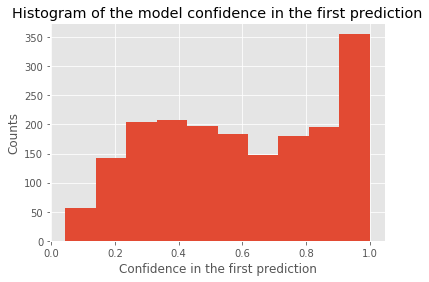

In [400]:
plt.style.use('ggplot')
x = df.p1_conf
plt.hist(x)
plt.title("Histogram of the model confidence in the first prediction")
plt.xlabel("Confidence in the first prediction");
plt.ylabel("Counts");

#### Q4. What is the average model accuracy in predicitng a dog in the first prediction?

In [401]:
print(f"The average model accuracy in predicitng a dog in the first prediction is {round(df.p1_dog.mean()*100, 2)}%")

The average model accuracy in predicitng a dog in the first prediction is 74.37%


#### Q5. Is there a relation between dog rating and retweet count ?

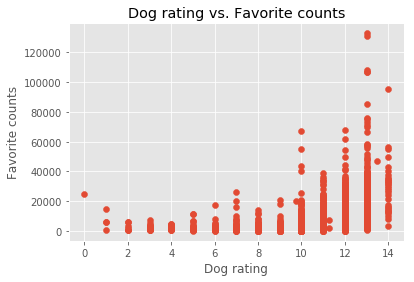

In [402]:
plt.style.use('ggplot')
# Removing outliers
df1 = df[['rating_numerator', 'favorite_count']].query("rating_numerator < 20")
x = df1.rating_numerator
y = df1.favorite_count
plt.scatter(x,y)
plt.title("Dog rating vs. Favorite counts")
plt.xlabel("Dog rating");
plt.ylabel("Favorite counts");

<b>In general, the number of favoritng the tweet increase with the increase in the dog rating. </b>

#### Q6. Is there a relation between dog rating and favorite count ?

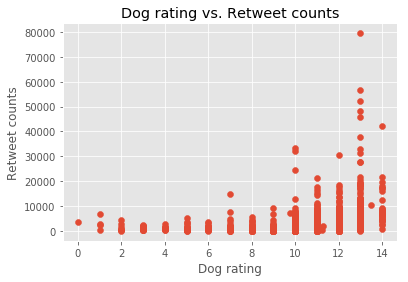

In [403]:
plt.style.use('ggplot')
# Removing outliers
df1 = df[['rating_numerator', 'retweet_count']].query("rating_numerator < 20")
x = df1.rating_numerator
y = df1.retweet_count
plt.scatter(x,y)
plt.title("Dog rating vs. Retweet counts")
plt.xlabel("Dog rating");
plt.ylabel("Retweet counts");

<b>In general, the number of retweets increase with the increase in the dog rating. </b>

#### Q7. Does a certain dog_stage recieve better rating than the other stages ?

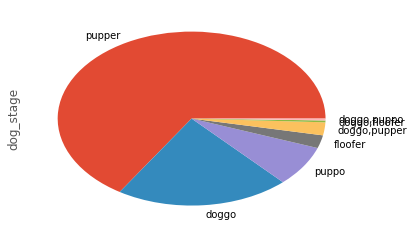

In [404]:
df.dog_stage[df.dog_stage!='nan'].value_counts().plot(kind="pie");

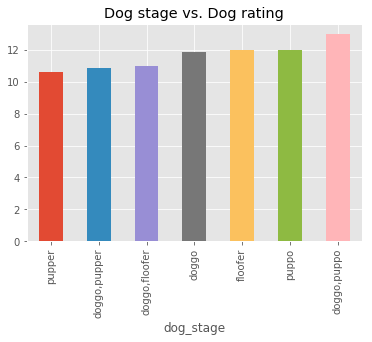

In [405]:
df3 = df[df.dog_stage != 'nan']
df3 = df3.groupby("dog_stage").mean()["rating_numerator"].sort_values().plot(kind='bar', title= "Dog stage vs. Dog rating")

<b>In general, puppo dog stage receive better ratings than the doggo and the pupper stages. Also, the puppo stage is less common compared with the other dog stages. </b>

#### Q8. What are the six most popular dog names ?

In [406]:
print(f"The six most popular dog names are {df.name.value_counts()[:6].index.values}")

The six most popular dog names are ['Charlie' 'Cooper' 'Lucy' 'Oliver' 'Penny' 'Tucker']


#### Q9. What are the top three dog breeds predicted by the model?

In [407]:
print(f"The top top three dog breeds in predicted by the model are {df.p1[df.p1_dog].value_counts()[:3].index.values}")

The top top three dog breeds in predicted by the model are ['golden_retriever' 'Labrador_retriever' 'Pembroke']


#### Q10. Are the dog ratings related to dog stage?

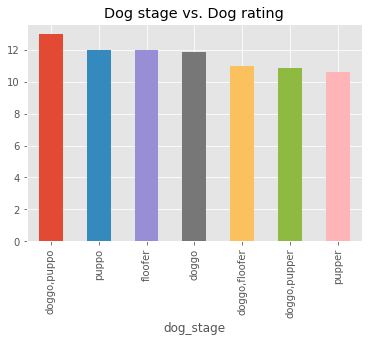

In [408]:
df3 = df[df.dog_stage != 'nan']
df3 = df3.groupby("dog_stage").mean()["rating_numerator"].sort_values(ascending=False).plot(kind='bar', title= "Dog stage vs. Dog rating")

<b>Dog ratings are affected by the dog stage. In general, puppo dog stage receive better ratings than the doggo and the pupper stages </b>

#### Q11. Does the dog breed affect its rating? What are the 25 most highly rated dog breeds ?

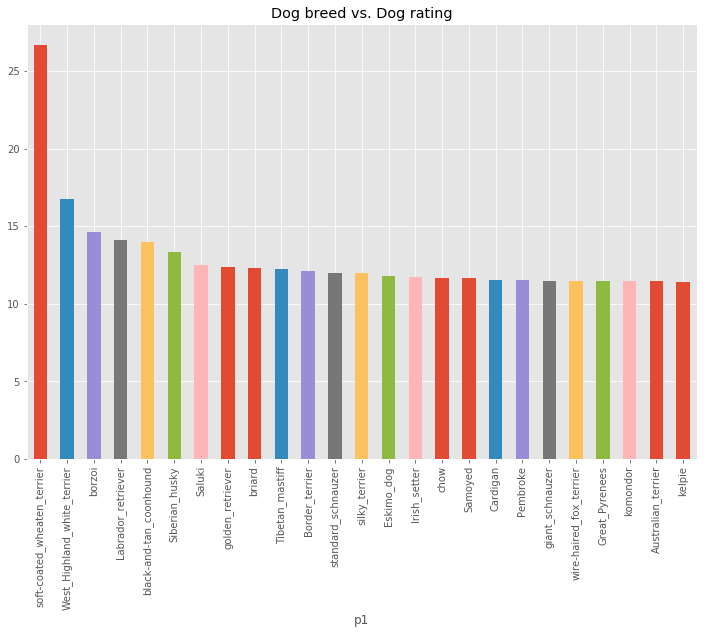

In [409]:
df4 = df[df.p1_dog][["p1","rating_numerator"]]
df4.groupby("p1").mean()["rating_numerator"].sort_values(ascending=False)[:25].plot(kind='bar', title= "Dog breed vs. Dog rating", figsize = (12,8));

<b>Dog ratings are affected by the dog breed. In general, dogs predicted as dumber receive better ratings than the other dog breeds </b>